# Proyek Analisis Data: E-Commerce Public Dataset
- Nama: Dike Ayu Wardani
- Email: dikeayuw@gmail.com
- Id Dicoding: dikewarda

## Menentukan Pertanyaan Bisnis

Pertanyaan:
- Bagaimana demografi pelanggan?
- Bagaimana penjualan revenue perusahaan satu tahun terakhir?
- Produk apa yang paling banyak terjual?
- Kategori produk apa yang paling banyak terjual?
- Kategori produk apa yang paling banyak dijual oleh seller?
- Kategori produk apa dengan rata-rata review paling bagus?
- Best seller berdasarkan jumlah order?
- Metode pembayaran apa yang paling banyak digunakan?

## Menyiapkan semua library yang dibutuhkan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

## Data Wrangling

### Gathering Data

Melihat nama file pada folder data

In [ ]:
list_data = ["./data/" + path for path in os.listdir("./data")]
list_data

['./data/customers_dataset.csv',
 './data/geolocation_dataset.csv',
 './data/orders_dataset.csv',
 './data/order_items_dataset.csv',
 './data/order_payments_dataset.csv',
 './data/order_reviews_dataset.csv',
 './data/products_dataset.csv',
 './data/product_category_name_translation.csv',
 './data/sellers_dataset.csv']

Memuat masing-masing data

In [ ]:
customers_df, geolocation_df, orders_df, order_items_df, order_payments_df,\
    order_reviews_df, products_df, product_category_name_translation_df, sellers_df = (
        pd.read_csv(data) for data in list_data)

### Assessing Data

#### Menilai data customers_df

In [ ]:
# menampilkan 5 data pertama
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
print("Jumlah duplikasi:", customers_df.duplicated().sum())
customers_df.describe(include="all")

Jumlah duplikasi: 0


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Tidak terdapat nilai kosong pada data customers_df, tipe data sudah sesuai, tidak terdapat data duplikat.

#### Menilai data geolocation_df

In [ ]:
# menampilkan 5 data pertama
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [ ]:
print("Jumlah duplikasi:", geolocation_df.duplicated().sum())
geolocation_df.describe(include="all")

Jumlah duplikasi: 261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


In [ ]:
geolocation_df[geolocation_df.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


Tidak terdapat missing value pada data geolocation_df, tipe data sudah sesuai, namun terdapat data duplikat sebanyak 261831 data.

#### Menilai data orders_df

In [ ]:
# menampilkan 5 data pertama
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
print("Jumlah duplikasi:", orders_df.duplicated().sum())
orders_df.describe(include="all")

Jumlah duplikasi: 0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Terdapat missing value pada kolom order_approved_at sebanyak 160, kolom order_delivered_carrier_date sebanyak 1783, kolom order_delivered_customer_date sebanyak 2965;
Tidak terdapat data duplikat; tipe data kolom keempat dan seterusnya belum dalam bentuk datetime.

#### Menilai data order_items_df

In [ ]:
# menampilkan 5 data pertama
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [ ]:
print("Jumlah duplikasi:", order_items_df.duplicated().sum())
order_items_df.describe(include="all")

Jumlah duplikasi: 0


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


Tidak terdapat missing value pada data order_items_df, kolom shipping_limit_date perlu diubah menjadi datetime, tidak ada data duplikat.

#### Menilai data order_payments_df

In [ ]:
# menampilkan 5 data pertama
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
order_payments_df.payment_installments.unique()

array([ 8,  1,  2,  3,  6,  5,  4, 10,  7, 12,  9, 13, 15, 24, 11, 18, 14,
       20, 21, 17, 22,  0, 16, 23], dtype=int64)

In [ ]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [ ]:
print("Jumlah duplikasi:", order_payments_df.duplicated().sum())
order_payments_df.describe(include="all")

Jumlah duplikasi: 0


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


Tidak terdapat missing value, tipe data sudah sesuai, tidak ada data duplikat.

#### Menilai data order_reviews_df

In [ ]:
# menampilkan 5 data pertama
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
print("Jumlah duplikasi:", order_reviews_df.duplicated().sum())
order_reviews_df.describe(include="all")

Jumlah duplikasi: 0


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


Terdapat missing value pada kolom review_comment_title dan review_comment_message, namun kolom-kolom tersebut adalah judul dan isi komentar (review) sehingga data missing value tidak perlu dihapus.
Tidak terdapat data duplikat, kolom review_creation_date dan review_answer_timestamp perlu diubah menjadi datetime.

#### Menilai data products_df

In [ ]:
# menampilkan 5 data pertama
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
products_df[products_df["product_category_name"].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [ ]:
print("Jumlah duplikasi:", products_df.duplicated().sum())
products_df.describe(include="all")

Jumlah duplikasi: 0


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


Terdapat missing value yang perlu dihapus karena tidak ada nama kategori produknya. Tidak terdapat data duplikat dan tipe data sudah sesuai.

#### Menilai data product_category_name_translation_df

In [ ]:
# menampilkan 5 data pertama
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
product_category_name_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [ ]:
print("Jumlah duplikasi:", product_category_name_translation_df.duplicated().sum())
product_category_name_translation_df.describe(include="all")

Jumlah duplikasi: 0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Tidak terdapat missing value, tipe data sesuai, dan tidak ada data duplikat.

#### Menilai data sellers_df

In [ ]:
# menampilkan 5 data pertama
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [ ]:
print("Jumlah duplikasi:", sellers_df.duplicated().sum())
sellers_df.describe(include="all")

Jumlah duplikasi: 0


,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


Tidak terdapat missing value, tipe data sudah sesuai, dan tidak terdapat data duplikat.

### Cleaning Data

#### Cleaning data customers_df

Tidak ada yang perlu dibersihkan pada tabel customers_df.

#### Cleaning data geolocation_df

In [ ]:
# membersihkan data duplikat
geolocation_df.drop_duplicates(inplace=True)
print("Jumlah duplikat:", geolocation_df.duplicated().sum())

Jumlah duplikat: 0


#### Cleaning data orders_df

In [ ]:
orders_df.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [ ]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
orders_df[orders_df.isna().any(axis=1)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


Data kosong (missing value) pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date bersesuaian dengan kolom order_status, sehingga kolom-kolom tersebut tidak perlu dihapus atau diganti.

In [ ]:
# mengubah tipe data pada kolom orders_df yang merupakan tipe datetime
columns = ["order_purchase_timestamp", "order_approved_at",
           "order_delivered_carrier_date", "order_delivered_customer_date",
           "order_estimated_delivery_date"]
for column in columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

Mengubah kolom order_status menjadi kategori

In [ ]:
orders_df.order_status = pd.Categorical(orders_df.order_status)

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  category      
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](5), object(2)
memory usage: 5.4+ MB


#### Cleaning data order_items_df

In [ ]:
# mengubah tipe data pada kolom shipping_limit_date menjadi datetime
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Cleaning data order_payments_df

Tidak ada yang perlu dibersihkan dari tabel order_payments_df

#### Cleaning data order_reviews_df

Kolom review_comment_title dan review_comment_message, namun kolom-kolom tersebut adalah judul dan isi komentar (review) sehingga data missing value tidak perlu dihapus.

Mengubah tipe data pada kolom review_creation_date dan review_answer_timestamp menjadi tipe data datetime

In [ ]:
columns = ["review_creation_date", "review_answer_timestamp"]
for column in columns:
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [ ]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


#### Cleaning data products_df

In [ ]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Menghapus data kosong (missing value) pada kolom product_category_name karena tidak ada namanya.

In [ ]:
products_df.dropna(axis=0, subset=["product_category_name"], inplace=True)

In [ ]:
# melihat sisa data yang terdapat missing value
products_df[products_df.isnull().any(axis=1)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN


Menghapus sisa satu baris yang memuat missing value

In [ ]:
products_df.dropna(axis=0, inplace=True)
print(products_df.isna().sum())

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


#### Cleaning data product_category_name_translation_df

Tidak ada data yang perlu dibersihkan pada tabel product_category_name_translation_df.

#### Cleaning data sellers_df

Tidak ada data yang perlu dibersihkan pada tabel sellers_df.

## Exploratory Data Analysis (EDA)

Pertanyaan:
- Bagaimana demografi pelanggan?
- Bagaimana penjualan revenue perusahaan satu tahun terakhir?
- Produk apa yang paling banyak terjual?
- Kategori produk apa yang paling banyak terjual?
- Kategori produk apa yang paling banyak dijual oleh seller?
- Kategori produk apa dengan rata-rata review paling bagus?
- Best seller berdasarkan jumlah order?
- Metode pembayaran apa yang paling banyak digunakan?

### Eksplorasi data customers_df

Melihat sebaran jumlah pelanggan berdasarkan kota (city) dan negara (state).

In [ ]:
print("5 kota (city) dengan jumlah pelanggan terbanyak:\n",
      customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(
          ascending=False).head(5),
      "\n")
print("5 negara (state) dengan jumlah pelanggan terbanyak:\n",
      customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(
          ascending=False).head(5))

5 kota (city) dengan jumlah pelanggan terbanyak:
 customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
Name: customer_id, dtype: int64 

5 negara (state) dengan jumlah pelanggan terbanyak:
 customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
Name: customer_id, dtype: int64


Melihat customer yang memiliki beberapa akun (customer_id)

In [ ]:
customers_df[customers_df.customer_unique_id.duplicated()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
679,c57b4b6f3719475543b721e720a526ad,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP
1463,9f6f3da49e2d46e3a7529f5e3c25ecce,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ
1607,299f7b5125c8fbe1761a1b320c34fc7d,b8b3c435a58aebd788a477bed8342910,95585,arroio do sal,RS
2811,226d59f9f4b98e228b689eea45d03a6d,66980c3775537536f77b434d74e520f5,30290,belo horizonte,MG
3198,b1253701171dfb298f52a221f824e45b,788313d21c3507fe890921f6e17aa679,11070,santos,SP
...,...,...,...,...,...
99324,5b46a0d983eec8c97363bea78d4a69dd,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG
99327,c1affa46f9f3b514555259049a0307b9,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG
99336,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP
99353,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES


In [ ]:
customers_df.groupby("customer_unique_id").customer_id.nunique().index

Index(['0000366f3b9a7992bf8c76cfdf3221e2', '0000b849f77a49e4a4ce2b2a4ca5be3f',
       '0000f46a3911fa3c0805444483337064', '0000f6ccb0745a6a4b88665a16c9f078',
       '0004aac84e0df4da2b147fca70cf8255', '0004bd2a26a76fe21f786e4fbd80607f',
       '00050ab1314c0e55a6ca13cf7181fecf', '00053a61a98854899e70ed204dd4bafe',
       '0005e1862207bf6ccc02e4228effd9a0', '0005ef4cd20d2893f0d9fbd94d3c0d97',
       ...
       'fff96bc586f78b1f070da28c4977e810', 'fffa431dd3fcdefea4b1777d114144f2',
       'fffb09418989a0dbff854a28163e47c6', 'fffbf87b7a1a6fa8b03f081c5f51a201',
       'fffcc512b7dfecaffd80f13614af1d16', 'fffcf5a5ff07b0908bd4e2dbc735a684',
       'fffea47cd6d3cc0a88bd621562a9d061', 'ffff371b4d645b6ecea244b27531430a',
       'ffff5962728ec6157033ef9805bacc48', 'ffffd2657e2aad2907e67c3e9daecbeb'],
      dtype='object', name='customer_unique_id', length=96096)

### Eksplorasi data orders_df

In [ ]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


Melihat jumlah order berdasarkan statusnya (order status).

In [ ]:
orders_df.groupby(by="order_status").order_id.nunique()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16812\1113902542.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders_df.groupby(by="order_status").order_id.nunique()


order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
Name: order_id, dtype: int64

Pilih order yang statusnya tidak canceled.

In [ ]:
new_orders_df = orders_df[orders_df.order_status!="canceled"]

Gabungkan data new_orders_df, order_items_df, order_payments_df, dan order_reviews_df

In [ ]:
all_orders_df = new_orders_df.merge(
    order_items_df, how="left", on="order_id").merge(
    order_reviews_df, how="left", on="order_id").merge(
    order_payments_df, how="left", on="order_id")

all_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58,1.0,credit_card,3.0,179.12


### Eksplorasi data products_df

Membuat kolom volume product dan kategori volume product

In [ ]:
products_df["product_volume"] = products_df.product_length_cm \
    * products_df.product_height_cm \
    * products_df.product_width_cm / 1000  # ubah menjadi dm^3

bins = [0, 1, 5, 10, 20, 30, np.inf]
labels = ["0-1 dm^3", "1-5 dm^3", "5-10 dm^3", "10-20 dm^3", "20-30 dm^3", ">30 dm^3"]
products_df["product_volume_category"] = pd.cut(
    products_df["product_volume"], bins=bins, labels=labels,
    include_lowest=True, right=False, ordered=True)

Membuat kategori berat product

In [ ]:
bins = [0, 1, 5, 10, 20, 30, np.inf]
labels = ["0-1 kg", "1-5 kg", "5-10 kg", "10-20 kg", "20-30 kg", ">30 kg"]
products_df["product_weight_category_kg"] = pd.cut(
    products_df["product_weight_g"] / 1000,
    bins=bins, labels=labels, include_lowest=True,
    right=False, ordered=True)

Menggabungkan products_df dan product_cateogory_name_translation_df

In [ ]:
new_products_df = pd.merge(
    products_df, product_category_name_translation_df,
    how="left", on="product_category_name")

In [ ]:
new_products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume,product_volume_category,product_weight_category_kg,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2.240,1-5 dm^3,0-1 kg,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10.800,10-20 dm^3,1-5 kg,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2.430,1-5 dm^3,0-1 kg,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2.704,1-5 dm^3,0-1 kg,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4.420,1-5 dm^3,0-1 kg,housewares


### Eksplorasi data sellers_df

In [ ]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Melihat sebaran jumlah seller berdasarkan kota (city) dan negara (state).

In [ ]:
print("5 kota (city) dengan jumlah seller terbanyak:\n",
      sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(
          ascending=False).head(5),
      "\n")
print("5 negara (state) dengan jumlah seller terbanyak:\n",
      sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(
          ascending=False).head(5))

5 kota (city) dengan jumlah seller terbanyak:
 seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
Name: seller_id, dtype: int64 

5 negara (state) dengan jumlah seller terbanyak:
 seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
Name: seller_id, dtype: int64


### Eksplorasi all_df

Menggabungkan data orders, products, dan sellers

In [ ]:
all_df = pd.merge(
    all_orders_df, new_products_df,
    how="left", on="product_id"
).merge(
    sellers_df, how="left", on="seller_id"
).merge(
    customers_df, how="left", on="customer_id"
)
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_volume_category,product_weight_category_kg,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,1-5 dm^3,0-1 kg,housewares,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,1-5 dm^3,0-1 kg,housewares,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,1-5 dm^3,0-1 kg,housewares,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,1-5 dm^3,0-1 kg,perfumery,31570.0,belo horizonte,SP,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,5-10 dm^3,0-1 kg,auto,14840.0,guariba,SP,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana demografi pelanggan?

In [ ]:
print("5 kota (city) dengan jumlah pelanggan terbanyak:\n",
      all_df.groupby(by="customer_city").customer_id.nunique().sort_values(
          ascending=False).head(5),
      "\n")
print("5 negara (state) dengan jumlah pelanggan terbanyak:\n",
      all_df.groupby(by="customer_state").customer_id.nunique().sort_values(
          ascending=False).head(5))

5 kota (city) dengan jumlah pelanggan terbanyak:
 customer_city
sao paulo         15400
rio de janeiro     6834
belo horizonte     2756
brasilia           2124
curitiba           1511
Name: customer_id, dtype: int64 

5 negara (state) dengan jumlah pelanggan terbanyak:
 customer_state
SP    41419
RJ    12766
MG    11571
RS     5441
PR     5023
Name: customer_id, dtype: int64


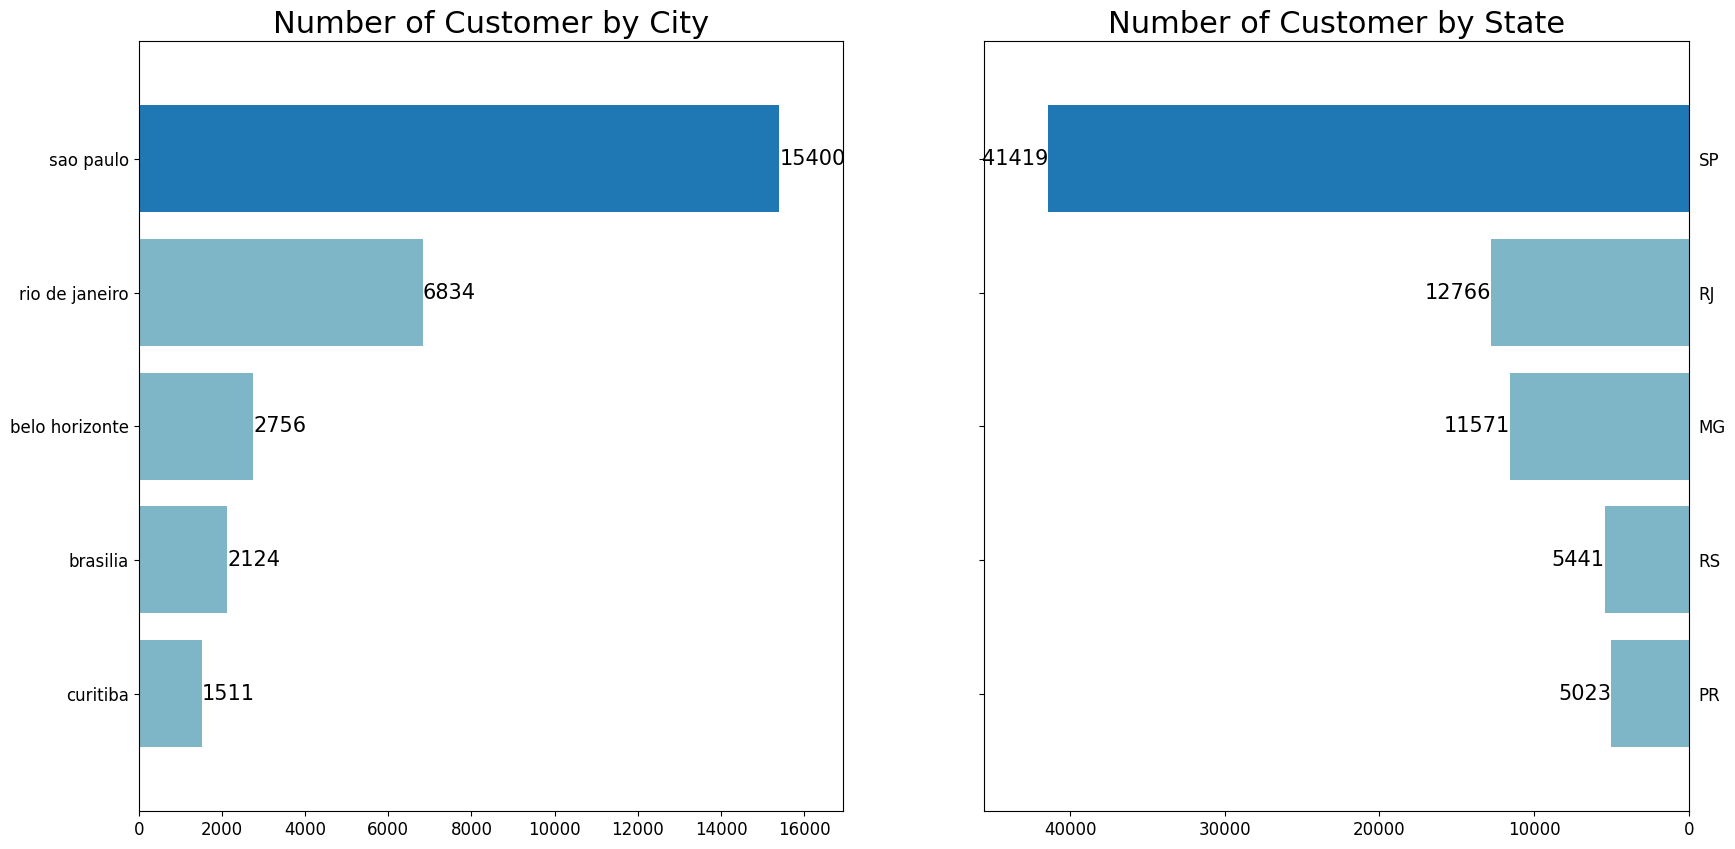

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# by city
sns.barplot(
    all_df.groupby("customer_city").customer_id.nunique().sort_values(
          ascending=False).head(5),
    ax=ax[0],
    orient="h",
    color="#72BCD4"
)
ax[0].patches[0].set_facecolor("#1f77b4")
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Number of Customer by City", fontsize=22)
ax[0].tick_params(axis="y", labelsize=12)
ax[0].tick_params(axis="x", labelsize=12)
ax[0].bar_label(ax[0].containers[0], label_type="edge", fontsize=15)
ax[0].margins(0.1)

# by state
sns.barplot(
    all_df.groupby("customer_state").customer_id.nunique().sort_values(
          ascending=False).head(5),
    ax=ax[1],
    orient="h",
    color="#72BCD4"
)
ax[1].patches[0].set_facecolor("#1f77b4")
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Number of Customer by State", fontsize=22)
ax[1].invert_xaxis()
ax[1].tick_params(axis="y", labelsize=12, labelleft=False, labelright=True)
ax[1].tick_params(axis="x", labelsize=12)
ax[1].bar_label(ax[1].containers[0], label_type="edge", fontsize=15)
ax[1].margins(0.1)

### Pertanyaan 2: Bagaimana penjualan dan revenue perusahaan satu tahun terakhir?

Mencari jumlah order dan revenue per bulan

In [ ]:
monthly_orders_df = all_df.resample(rule="M", on="order_purchase_timestamp").agg({
    "order_id": "nunique",
    "payment_value": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime("%Y-%m")
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(
    columns={
        "order_id": "order_count",
        "payment_value": "revenue"
    }, inplace=True)

monthly_orders_df.sort_values(
    by="order_purchase_timestamp",ascending=True, inplace=True)

monthly_orders_df.head()

,order_purchase_timestamp,order_count,revenue
0,2016-09,2,272.46
1,2016-10,300,70784.71
2,2016-11,0,0.00
3,2016-12,1,19.62
4,2017-01,797,190437.99


In [ ]:
monthly_orders_df = all_df.resample(rule="M", on="order_purchase_timestamp").agg({
    "order_id": "nunique",
    "payment_value": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime("%Y-%m")
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(
    columns={
        "order_id": "order_count",
        "payment_value": "revenue"
    }, inplace=True)

monthly_orders_df.sort_values(
    by="order_purchase_timestamp",ascending=True, inplace=True)

monthly_orders_df.head()

,order_purchase_timestamp,order_count,revenue
0,2016-09,2,272.46
1,2016-10,300,70784.71
2,2016-11,0,0.00
3,2016-12,1,19.62
4,2017-01,797,190437.99


Text(0.5, 1.0, 'Number of Orders per Month (Last 12 Month)')

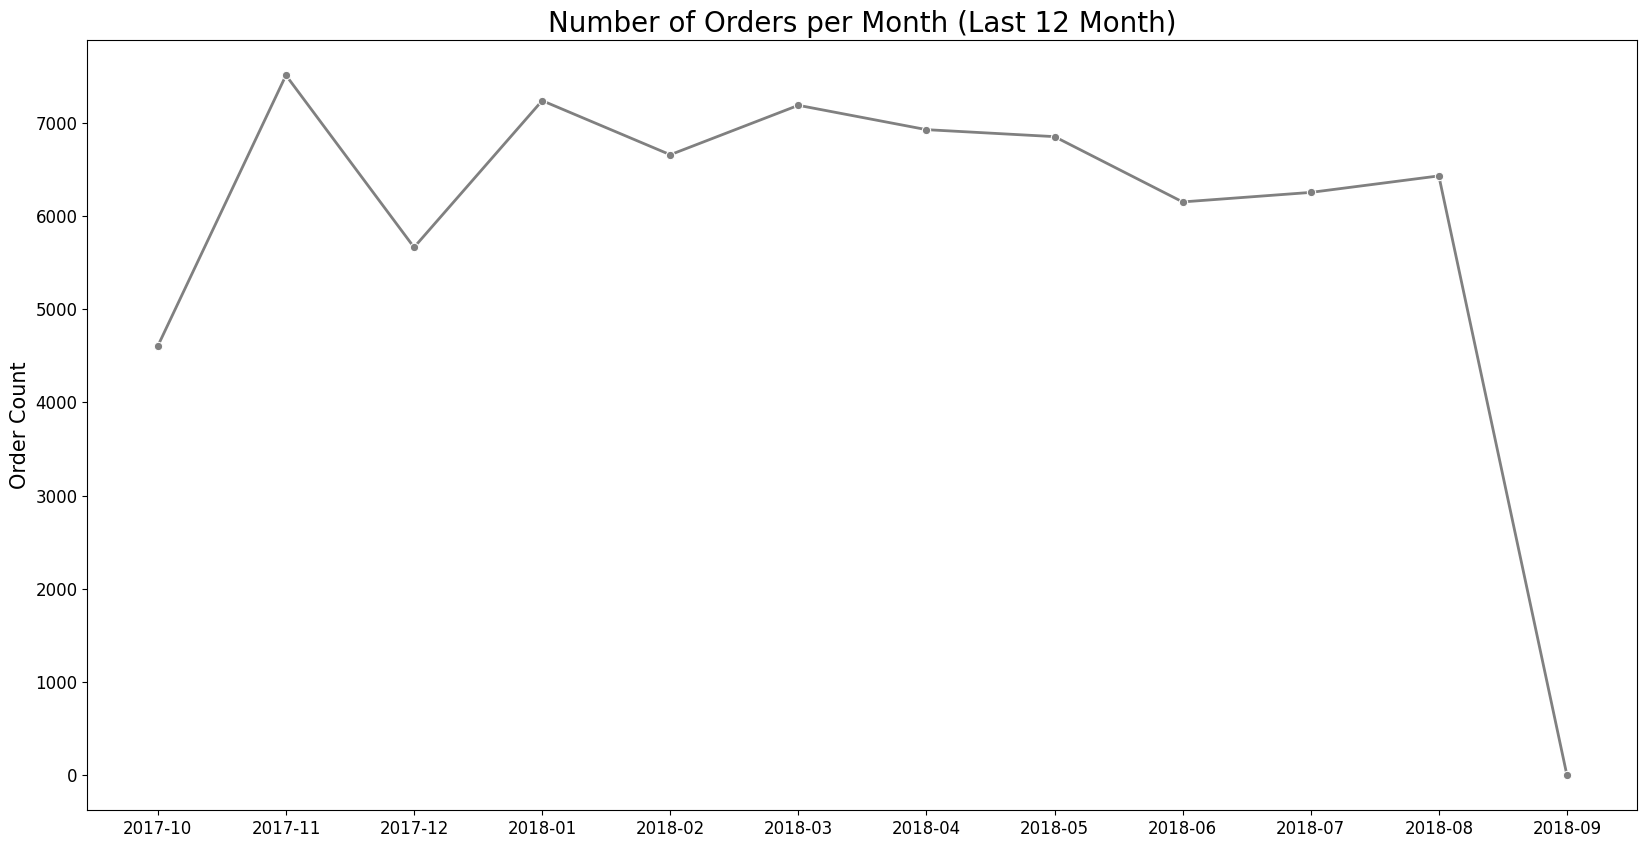

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(
    x="order_purchase_timestamp",
    y="order_count",
    data=monthly_orders_df.tail(12),
    marker="o",
    color="gray",
    linewidth=2
)
ax.set_xlabel(None)
ax.set_ylabel("Order Count", fontsize=15)
ax.tick_params("x", labelsize=12)
ax.tick_params("y", labelsize=12)
ax.set_title("Number of Orders per Month (Last 12 Month)", loc="center", fontsize=20)

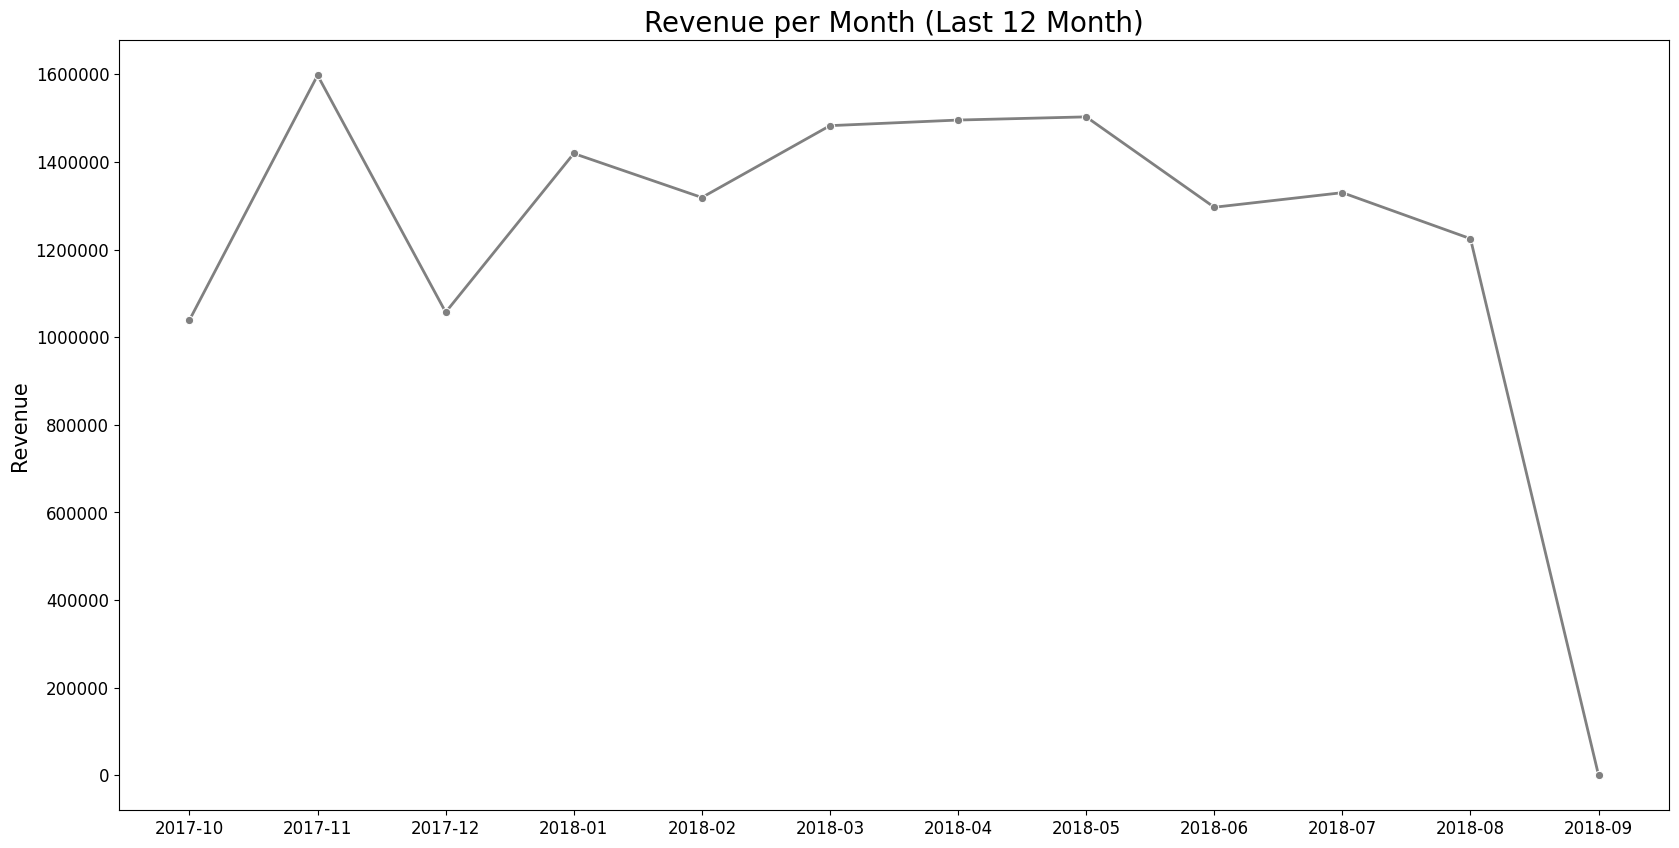

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(
    x="order_purchase_timestamp",
    y="revenue",
    data=monthly_orders_df.tail(12),
    marker="o",
    color="gray",
    linewidth=2
)
ax.set_xlabel(None)
ax.set_ylabel("Revenue", fontsize=15)
ax.tick_params("x", labelsize=12)
ax.tick_params("y", labelsize=12)
ax.set_title("Revenue per Month (Last 12 Month)", loc="center", fontsize=20)
ax.ticklabel_format(style="plain", axis="y")

Penjualan pada bulan 10 tahun 2017 hingga bulan 8 tahun 2018 mengalami kenaikan dan penurunan yang wajar dengan rentang R$2000, namun pada bulan 9 tahun 2018 penjualannya turun karena data di hulan tersebut masih sedikit (belum penuh satu bulan).

### Pertanyaan 3: Produk apa yang paling banyak terjual?

Produk ID berdasarkan jumlah penjualan.

In [ ]:
byproduct_df = all_df.groupby(by="product_id").order_item_id.sum() \
    .sort_values(ascending=False).reset_index()
byproduct_df.columns = ["product_id", "product_count"]
byproduct_df.head(10)

,product_id,product_count
0,422879e10f46682990de24d770e7f83d,826.0
1,aca2eb7d00ea1a7b8ebd4e68314663af,650.0
2,99a4788cb24856965c36a24e339b6058,587.0
3,368c6c730842d78016ad823897a372db,564.0
4,53759a2ecddad2bb87a079a1f1519f73,563.0
5,389d119b48cf3043d311335e499d9c6b,551.0
6,d1c427060a0f73f6b889a5c7c61f2ac4,381.0
7,a62e25e09e05e6faf31d90c6ec1aa3d1,368.0
8,53b36df67ebb7c41585e8d54d6772e08,363.0
9,b532349fe46b38fbc7bb3914c1bdae07,324.0


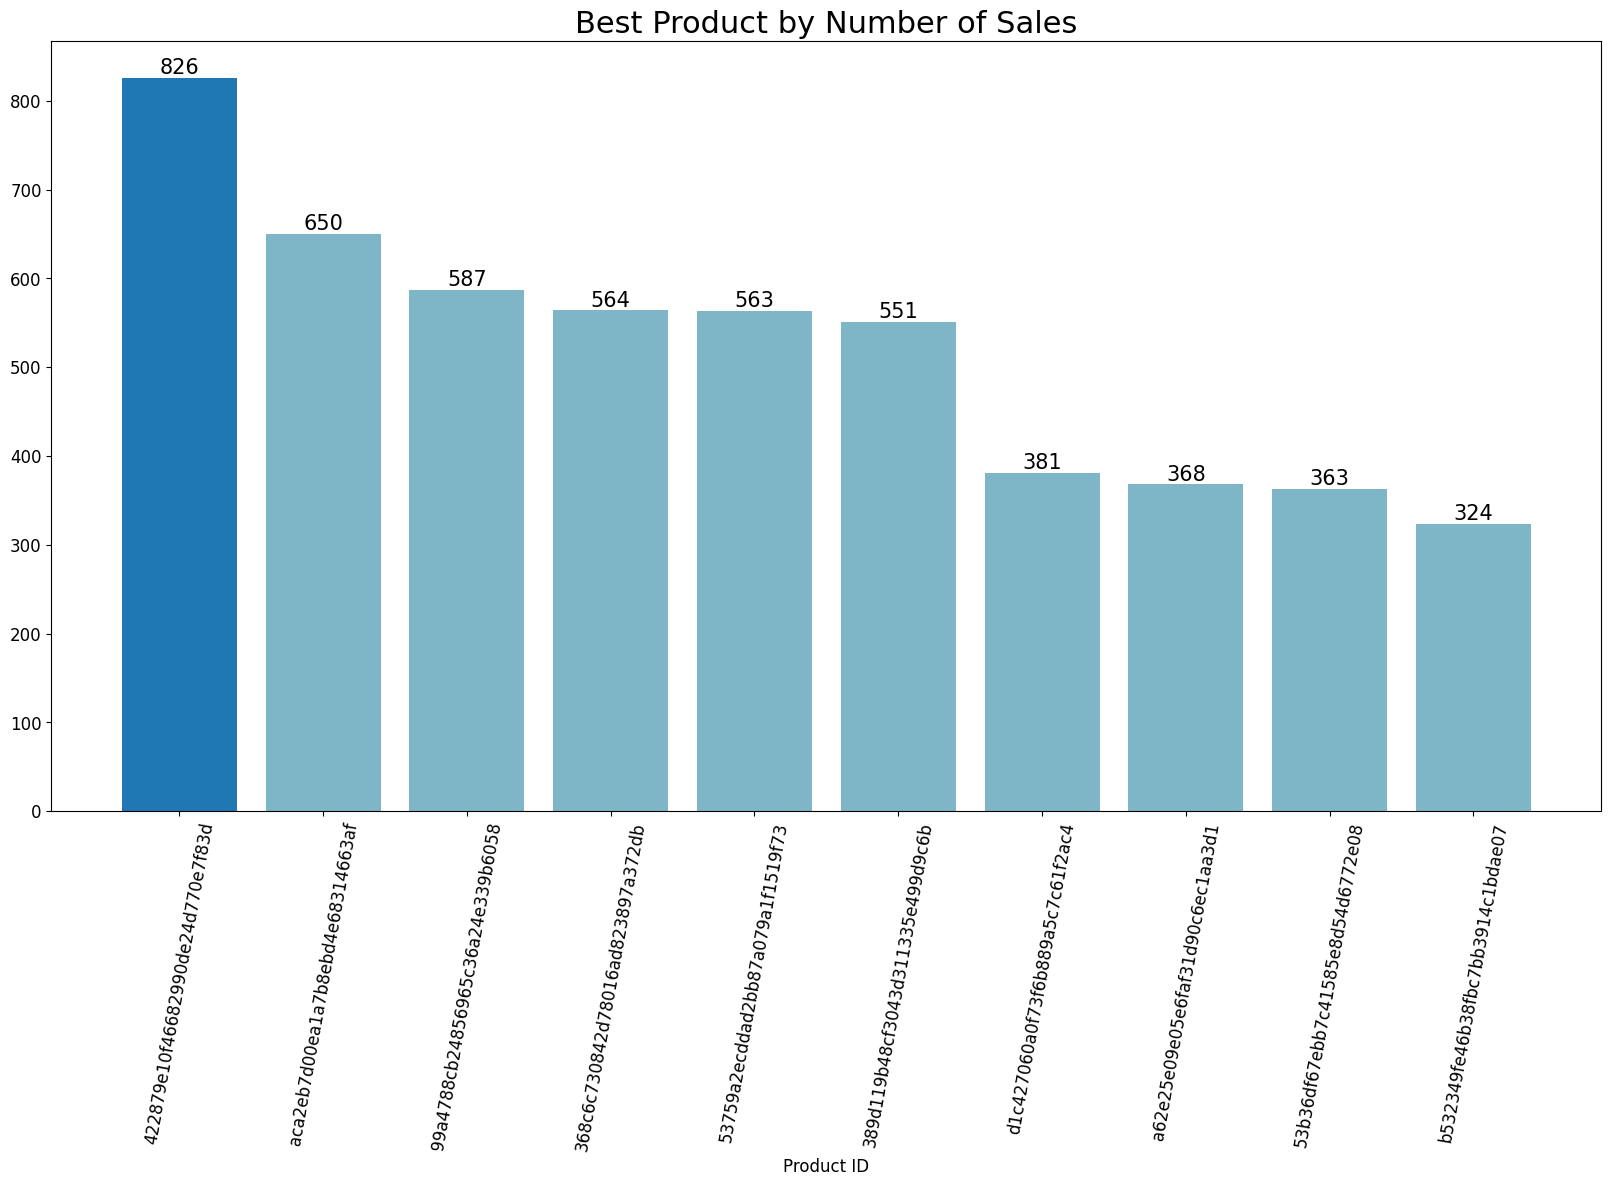

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(
    x="product_id",
    y="product_count",
    data=byproduct_df.head(10),
    color="#72BCD4"
)
ax.patches[0].set_facecolor("#1f77b4")
ax.set_ylabel(None)
ax.set_xlabel("Product ID", fontsize=12)
ax.set_title("Best Product by Number of Sales", fontsize=22)
ax.tick_params(axis="x", labelsize=12, rotation=80)
ax.tick_params(axis="y", labelsize=12)
ax.bar_label(ax.containers[0], label_type="edge", fontsize=15)
ax.margins(0.05)

### Pertanyaan 4: Kategori produk apa yang paling banyak terjual?

Nama kategori produk berdasarkan jumlah penjualan.

In [ ]:
byproduct_category_df = all_df.groupby(by="product_category_name_english").agg({
    "order_item_id": "sum",
    "seller_id": "nunique",
    "review_score": "mean"
}).reset_index()
byproduct_category_df.columns = ["product_category_name_english",
                                 "order_count", "seller_count", "review_score"]
byproduct_category_df.sort_values(by="order_count", ascending=False).head(10)

,product_category_name_english,order_count,seller_count,review_score
7,bed_bath_table,14777.0,195,3.893229
39,furniture_decor,12114.0,366,3.924190
43,health_beauty,11450.0,489,4.146159
65,sports_leisure,10292.0,477,4.122596
15,computers_accessories,10203.0,285,3.950378
49,housewares,9475.0,463,4.081661
70,watches_gifts,6801.0,98,4.026217
42,garden_tools,6116.0,235,4.034597
68,telephony,5333.0,146,3.956150
5,auto,5022.0,375,4.076318


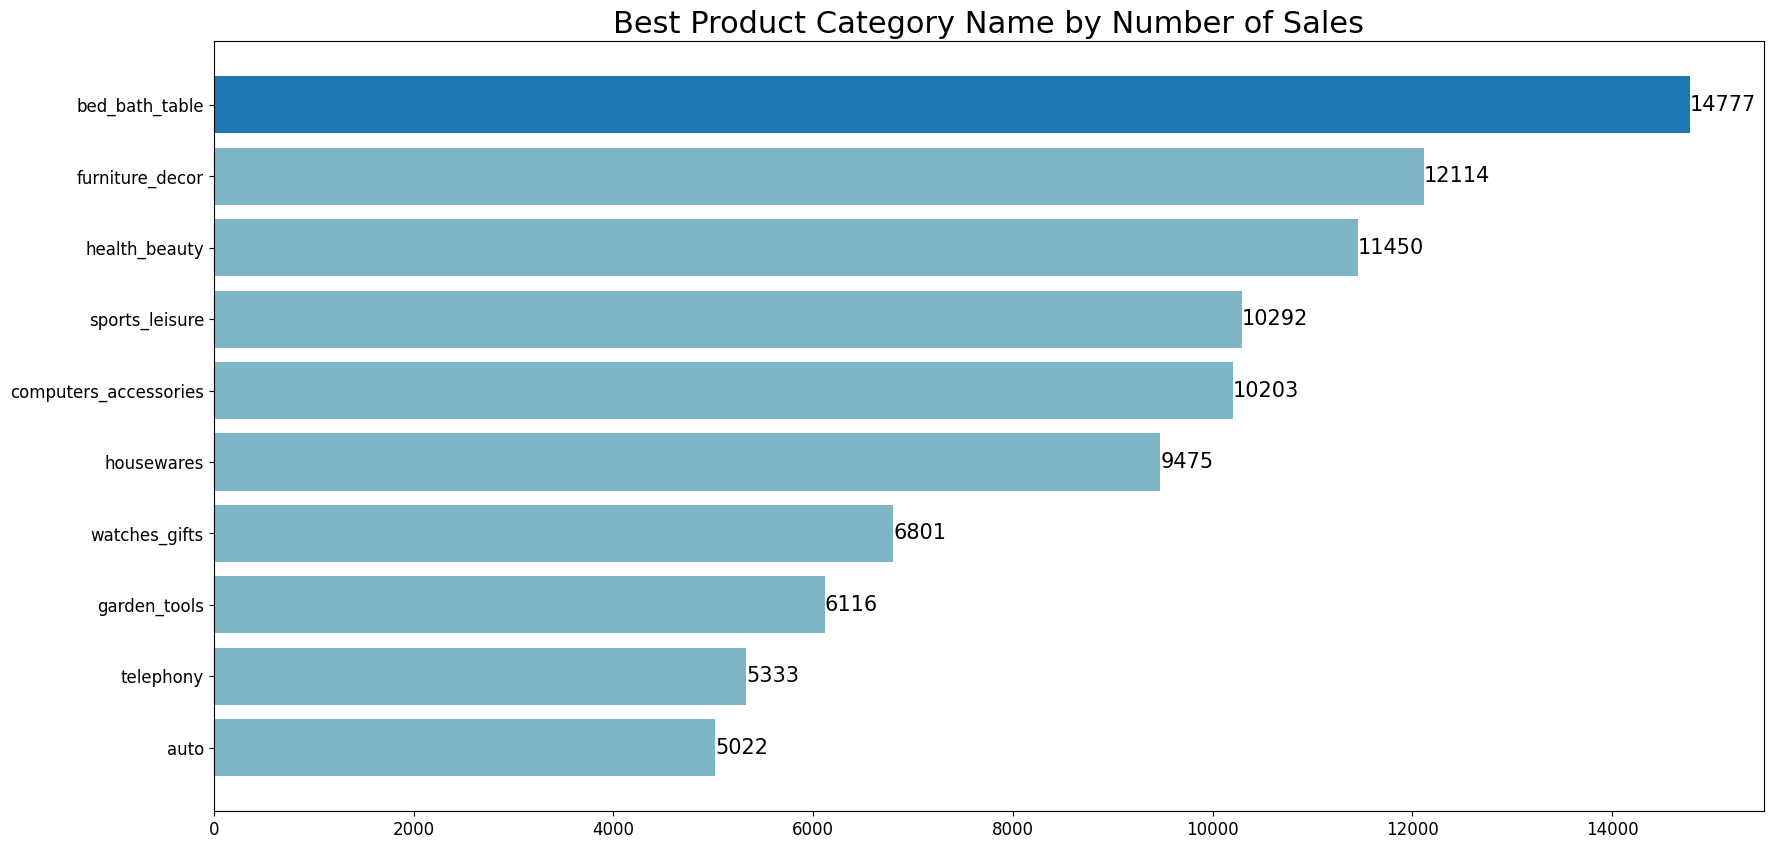

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(
    y="product_category_name_english",
    x="order_count",
    data=byproduct_category_df.sort_values(by="order_count", ascending=False).head(10),
    color="#72BCD4"
)
ax.patches[0].set_facecolor("#1f77b4")
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Best Product Category Name by Number of Sales", fontsize=22)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.bar_label(ax.containers[0], label_type="edge", fontsize=15)
ax.margins(0.05)

### Pertanyaan 5: Kategori produk apa yang paling banyak dijual oleh seller?

In [ ]:
byproduct_category_df.sort_values(by="seller_count", ascending=False).head(10)

,product_category_name_english,order_count,seller_count,review_score
43,health_beauty,11450.0,489,4.146159
65,sports_leisure,10292.0,477,4.122596
49,housewares,9475.0,463,4.081661
5,auto,5022.0,375,4.076318
39,furniture_decor,12114.0,366,3.924190
15,computers_accessories,10203.0,285,3.950378
20,cool_stuff,4279.0,264,4.151139
69,toys,4582.0,249,4.181387
6,baby,3545.0,243,4.027558
42,garden_tools,6116.0,235,4.034597


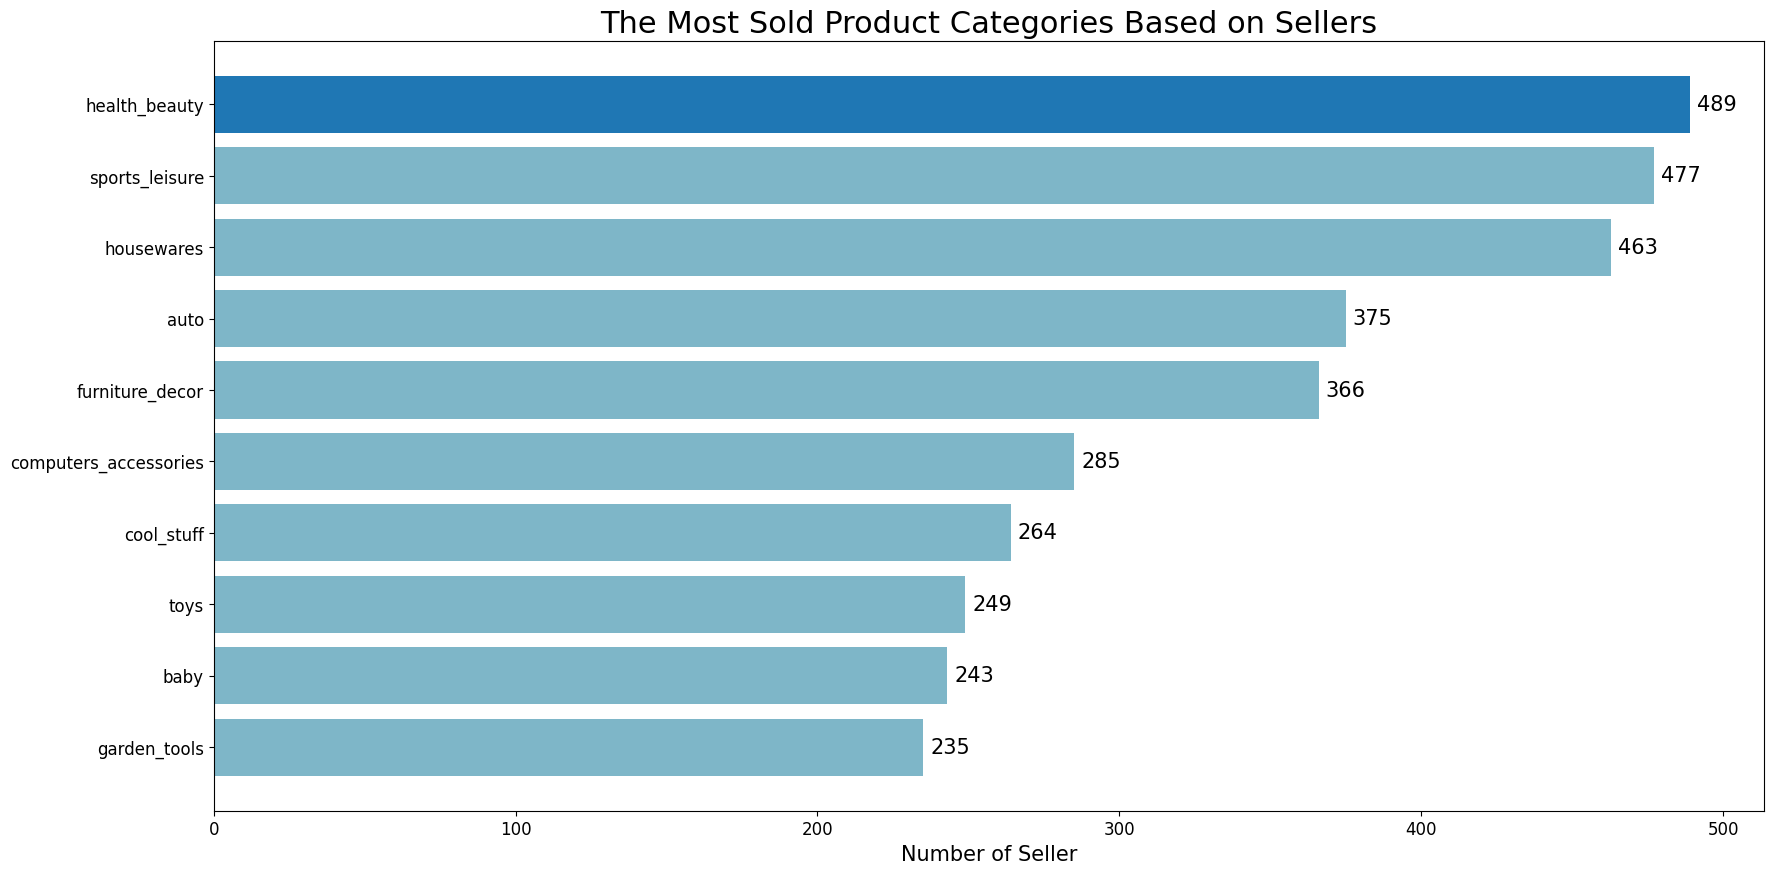

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(
    y="product_category_name_english",
    x="seller_count",
    data=byproduct_category_df.sort_values(by="seller_count", ascending=False).head(10),
    color="#72BCD4"
)
ax.patches[0].set_facecolor("#1f77b4")
ax.set_ylabel(None)
ax.set_xlabel("Number of Seller", fontsize=15)
ax.set_title("The Most Sold Product Categories Based on Sellers", fontsize=22)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.bar_label(ax.containers[0], label_type="edge", fontsize=15, padding=5)
ax.margins(0.05)

### Pertanyaan 6: Kategori produk apa dengan rata-rata review paling bagus?

In [ ]:
byproduct_category_df.sort_values(by="review_score", ascending=False).head(10)

,product_category_name_english,order_count,seller_count,review_score
11,cds_dvds_musicals,16.0,1,4.642857
29,fashion_childrens_clothes,8.0,4,4.500000
8,books_general_interest,614.0,53,4.474729
9,books_imported,71.0,7,4.419355
35,flowers,37.0,3,4.419355
22,costruction_tools_tools,111.0,24,4.415842
10,books_technical,280.0,26,4.375465
37,food_drink,377.0,33,4.335640
64,small_appliances_home_oven_and_coffee,79.0,15,4.320513
53,luggage_accessories,1252.0,73,4.307359


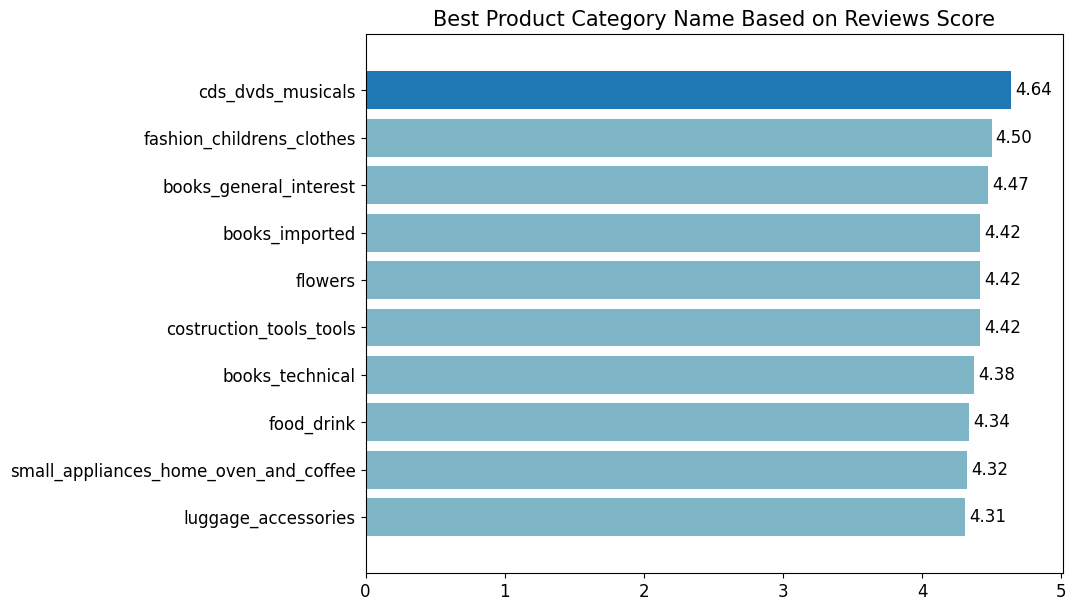

In [ ]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.barplot(
    x="review_score",
    y="product_category_name_english",
    data=byproduct_category_df.sort_values(by="review_score", ascending=False).head(10),
    color="#72BCD4"
)
ax.patches[0].set_facecolor("#1f77b4")
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Best Product Category Name Based on Reviews Score", fontsize=15)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.bar_label(ax.containers[0], fmt="{:.2f}", label_type="edge", fontsize=12, padding=3)
ax.margins(0.08)

### Pertanyaan 7: Best seller berdasarkan jumlah order?

Mengelompokkan berdasarkan seller, kemudian hitung jumlah order.

In [ ]:
byseller_product_df = all_df.groupby(by="seller_id").agg({
    "order_id": "nunique"
}).sort_values(by="order_id", ascending=False).reset_index()
byseller_product_df.columns = ["seller_id", "order_count"]
byseller_product_df.head(10)

,seller_id,order_count
0,6560211a19b47992c3666cc44a7e94c0,1847
1,4a3ca9315b744ce9f8e9374361493884,1804
2,cc419e0650a3c5ba77189a1882b7556a,1697
3,1f50f920176fa81dab994f9023523100,1403
4,da8622b14eb17ae2831f4ac5b9dab84a,1314
5,955fee9216a65b617aa5c0531780ce60,1286
6,7a67c85e85bb2ce8582c35f2203ad736,1159
7,ea8482cd71df3c1969d7b9473ff13abc,1145
8,4869f7a5dfa277a7dca6462dcf3b52b2,1131
9,3d871de0142ce09b7081e2b9d1733cb1,1076


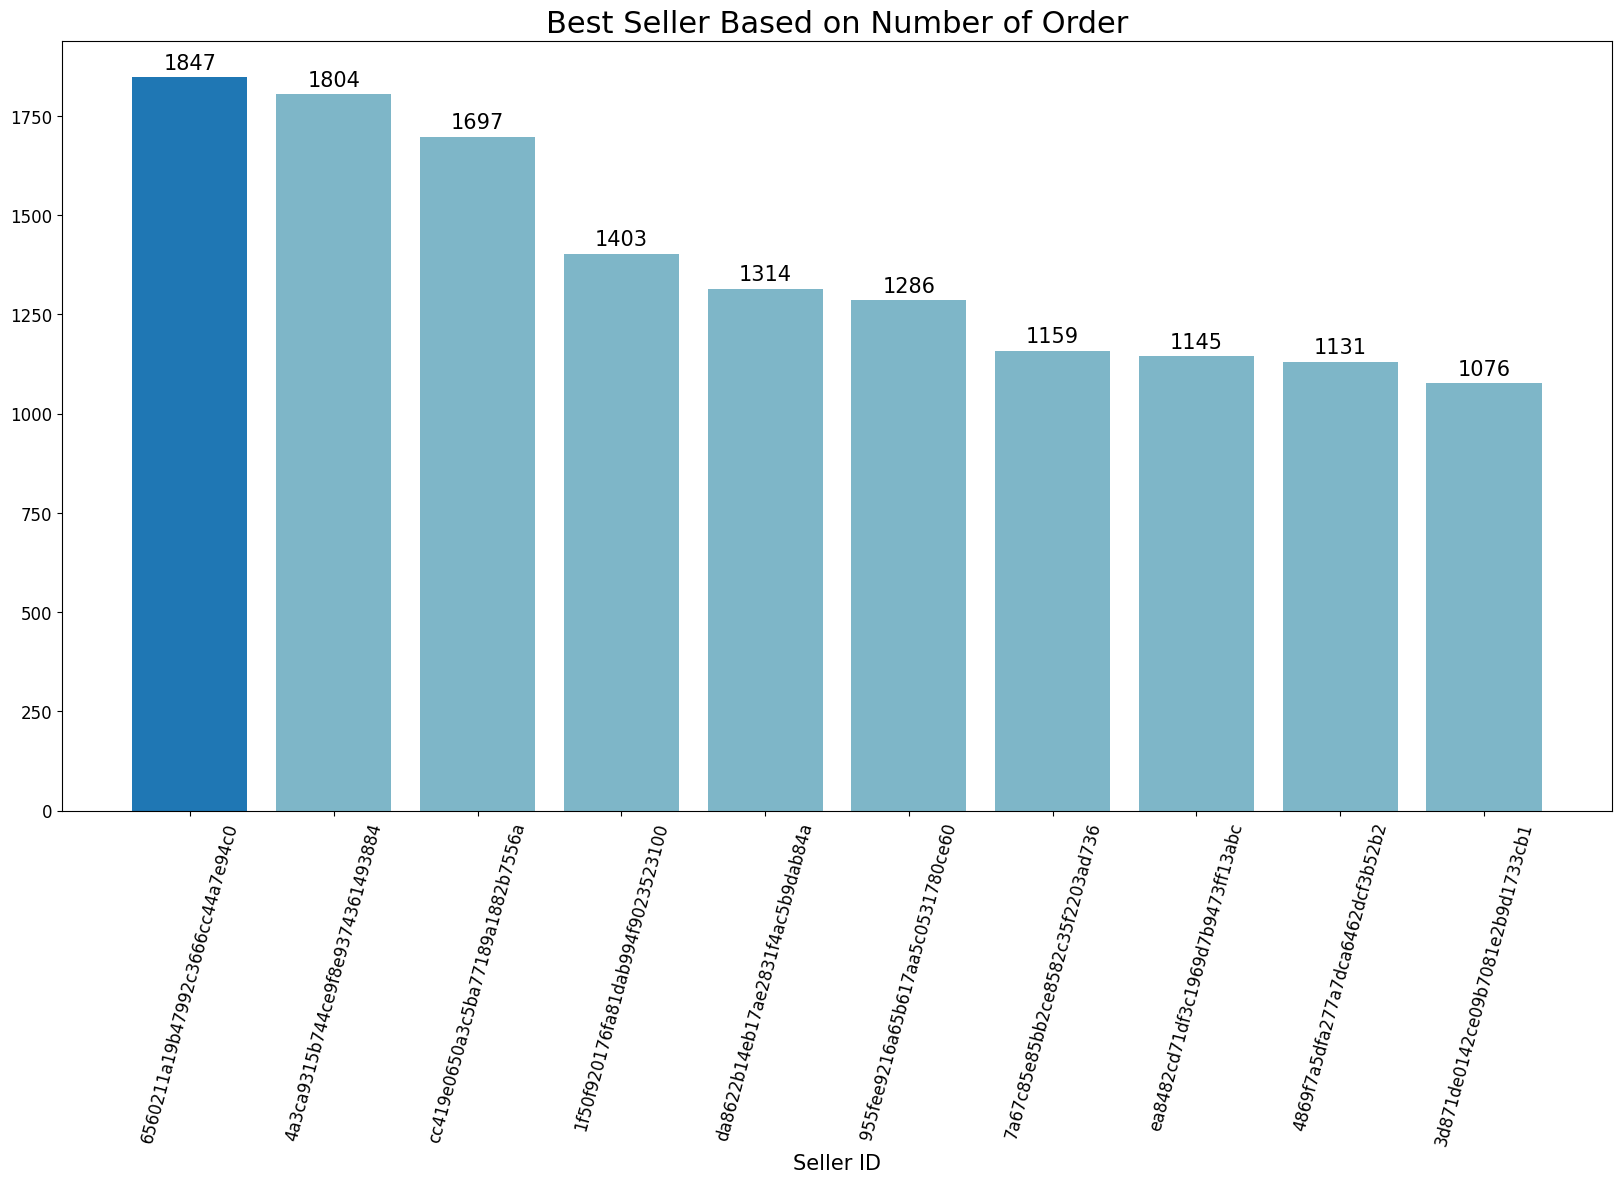

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(
    x="seller_id",
    y="order_count",
    data=byseller_product_df.head(10),
    color="#72BCD4"
)
ax.patches[0].set_facecolor("#1f77b4")
ax.set_ylabel(None)
ax.set_xlabel("Seller ID", fontsize=15)
ax.set_title("Best Seller Based on Number of Order", fontsize=22)
ax.tick_params(axis="x", labelsize=12, rotation=75)
ax.tick_params(axis="y", labelsize=12)
ax.bar_label(ax.containers[0], label_type="edge", fontsize=15, padding=3)
ax.margins(0.05)

### Pertanyaan 8: Bagaimana demografi sellers?

In [ ]:
print("5 kota (city) dengan jumlah seller terbanyak:\n",
      all_df.groupby(by="seller_city").seller_id.nunique().sort_values(
          ascending=False).head(5),
      "\n")
print("5 negara (state) dengan jumlah seller terbanyak:\n",
      all_df.groupby(by="seller_state").seller_id.nunique().sort_values(
          ascending=False).head(5))

5 kota (city) dengan jumlah seller terbanyak:
 seller_city
sao paulo         682
curitiba          126
rio de janeiro     96
belo horizonte     65
ribeirao preto     52
Name: seller_id, dtype: int64 

5 negara (state) dengan jumlah seller terbanyak:
 seller_state
SP    1823
PR     344
MG     240
SC     187
RJ     170
Name: seller_id, dtype: int64


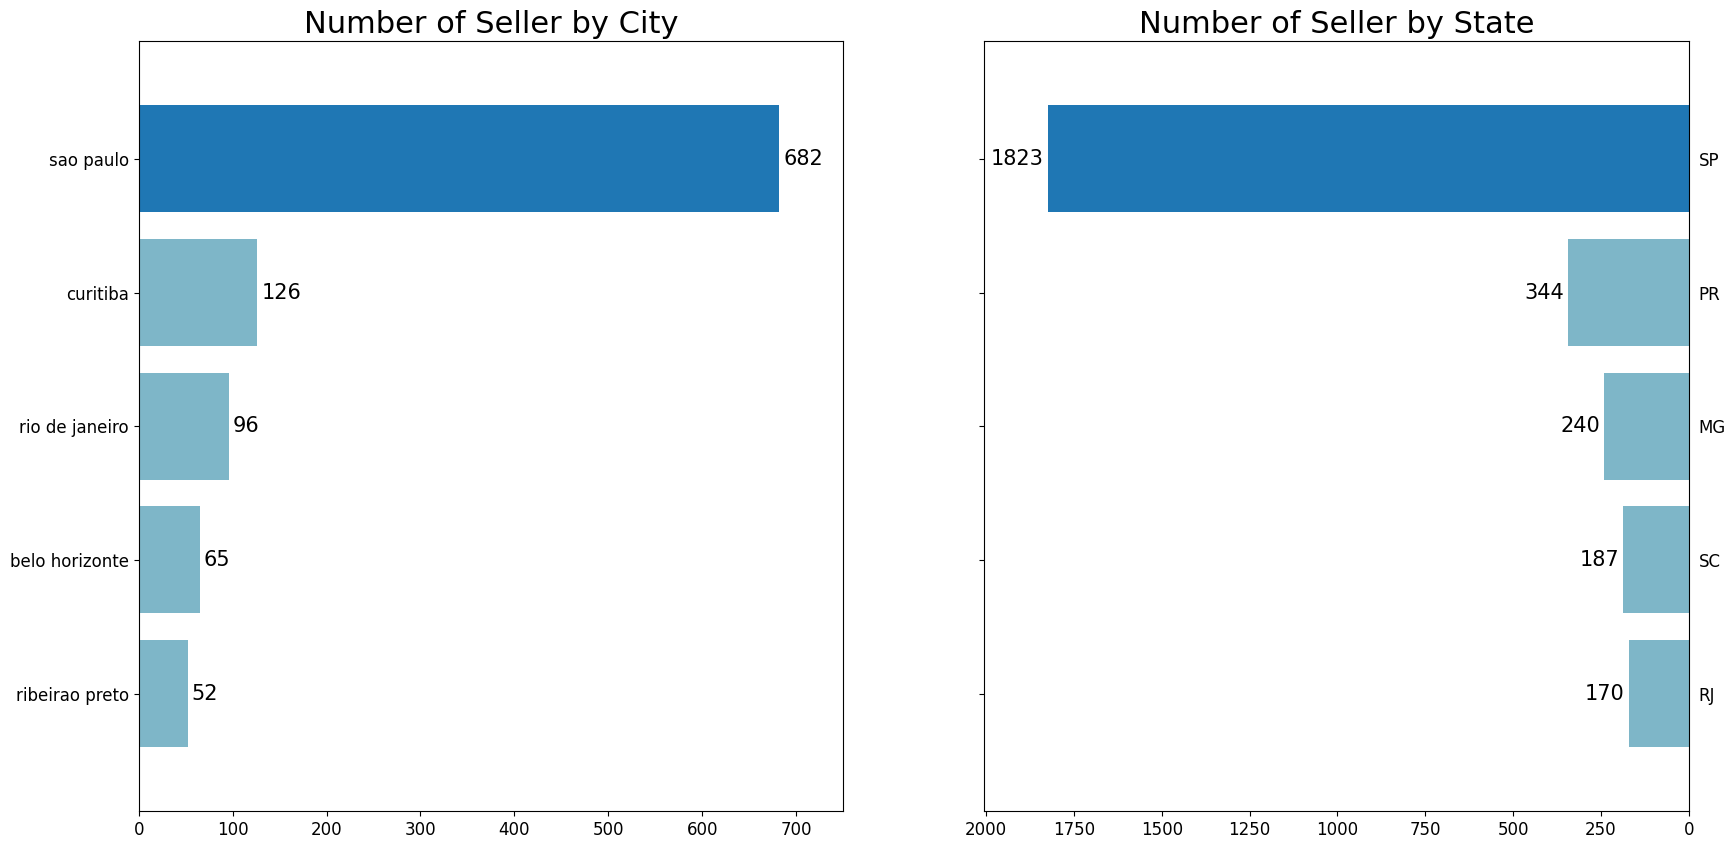

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# by city
sns.barplot(
    all_df.groupby("seller_city").seller_id.nunique().sort_values(
          ascending=False).head(5),
    ax=ax[0],
    orient="h",
    color="#72BCD4"
)
ax[0].patches[0].set_facecolor("#1f77b4")
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Number of Seller by City", fontsize=22)
ax[0].tick_params(axis="y", labelsize=12)
ax[0].tick_params(axis="x", labelsize=12)
ax[0].bar_label(ax[0].containers[0], label_type="edge", fontsize=15, padding=3)
ax[0].margins(0.1)

# by state
sns.barplot(
    all_df.groupby("seller_state").seller_id.nunique().sort_values(
          ascending=False).head(5),
    ax=ax[1],
    orient="h",
    color="#72BCD4"
)
ax[1].patches[0].set_facecolor("#1f77b4")
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Number of Seller by State", fontsize=22)
ax[1].invert_xaxis()
ax[1].tick_params(axis="y", labelsize=12, labelleft=False, labelright=True)
ax[1].tick_params(axis="x", labelsize=12)
ax[1].bar_label(ax[1].containers[0], label_type="edge", fontsize=15, padding=3)
ax[1].margins(0.1)

### Pertanyaan 9: Metode pembayaran apa yang paling banyak digunakan?

Mengelompokkan data berdasarkan metode pembayaran yang digunakan.

In [ ]:
bypayment_type_df = all_df.groupby("payment_type").order_id.nunique().reset_index()
bypayment_type_df.columns = ["payment_type", "order_count"]
bypayment_type_df

,payment_type,order_count
0,boleto,19689
1,credit_card,76061
2,debit_card,1521
3,voucher,3772


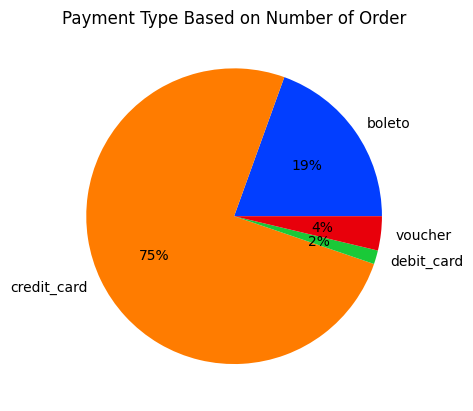

In [ ]:
colors = sns.color_palette("bright")[0:len(bypayment_type_df)]
plt.pie(bypayment_type_df.order_count, labels=bypayment_type_df.payment_type,
        colors=colors, autopct="%.0f%%", pctdistance=0.6)
plt.title("Payment Type Based on Number of Order")
plt.show()

### Best Customer berdasarkan RFM Analysis>?

Mencari RFM (Recency, Frequency, dan Monetary) dari masing-masing customer unik.

In [ ]:
rfm_df = all_df.groupby("customer_unique_id").agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "payment_value": "sum"
}).reset_index()

rfm_df.columns = ["customer_unique_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_unique_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,116
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,119
2,0000f46a3911fa3c0805444483337064,1,86.22,542
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,326
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,293


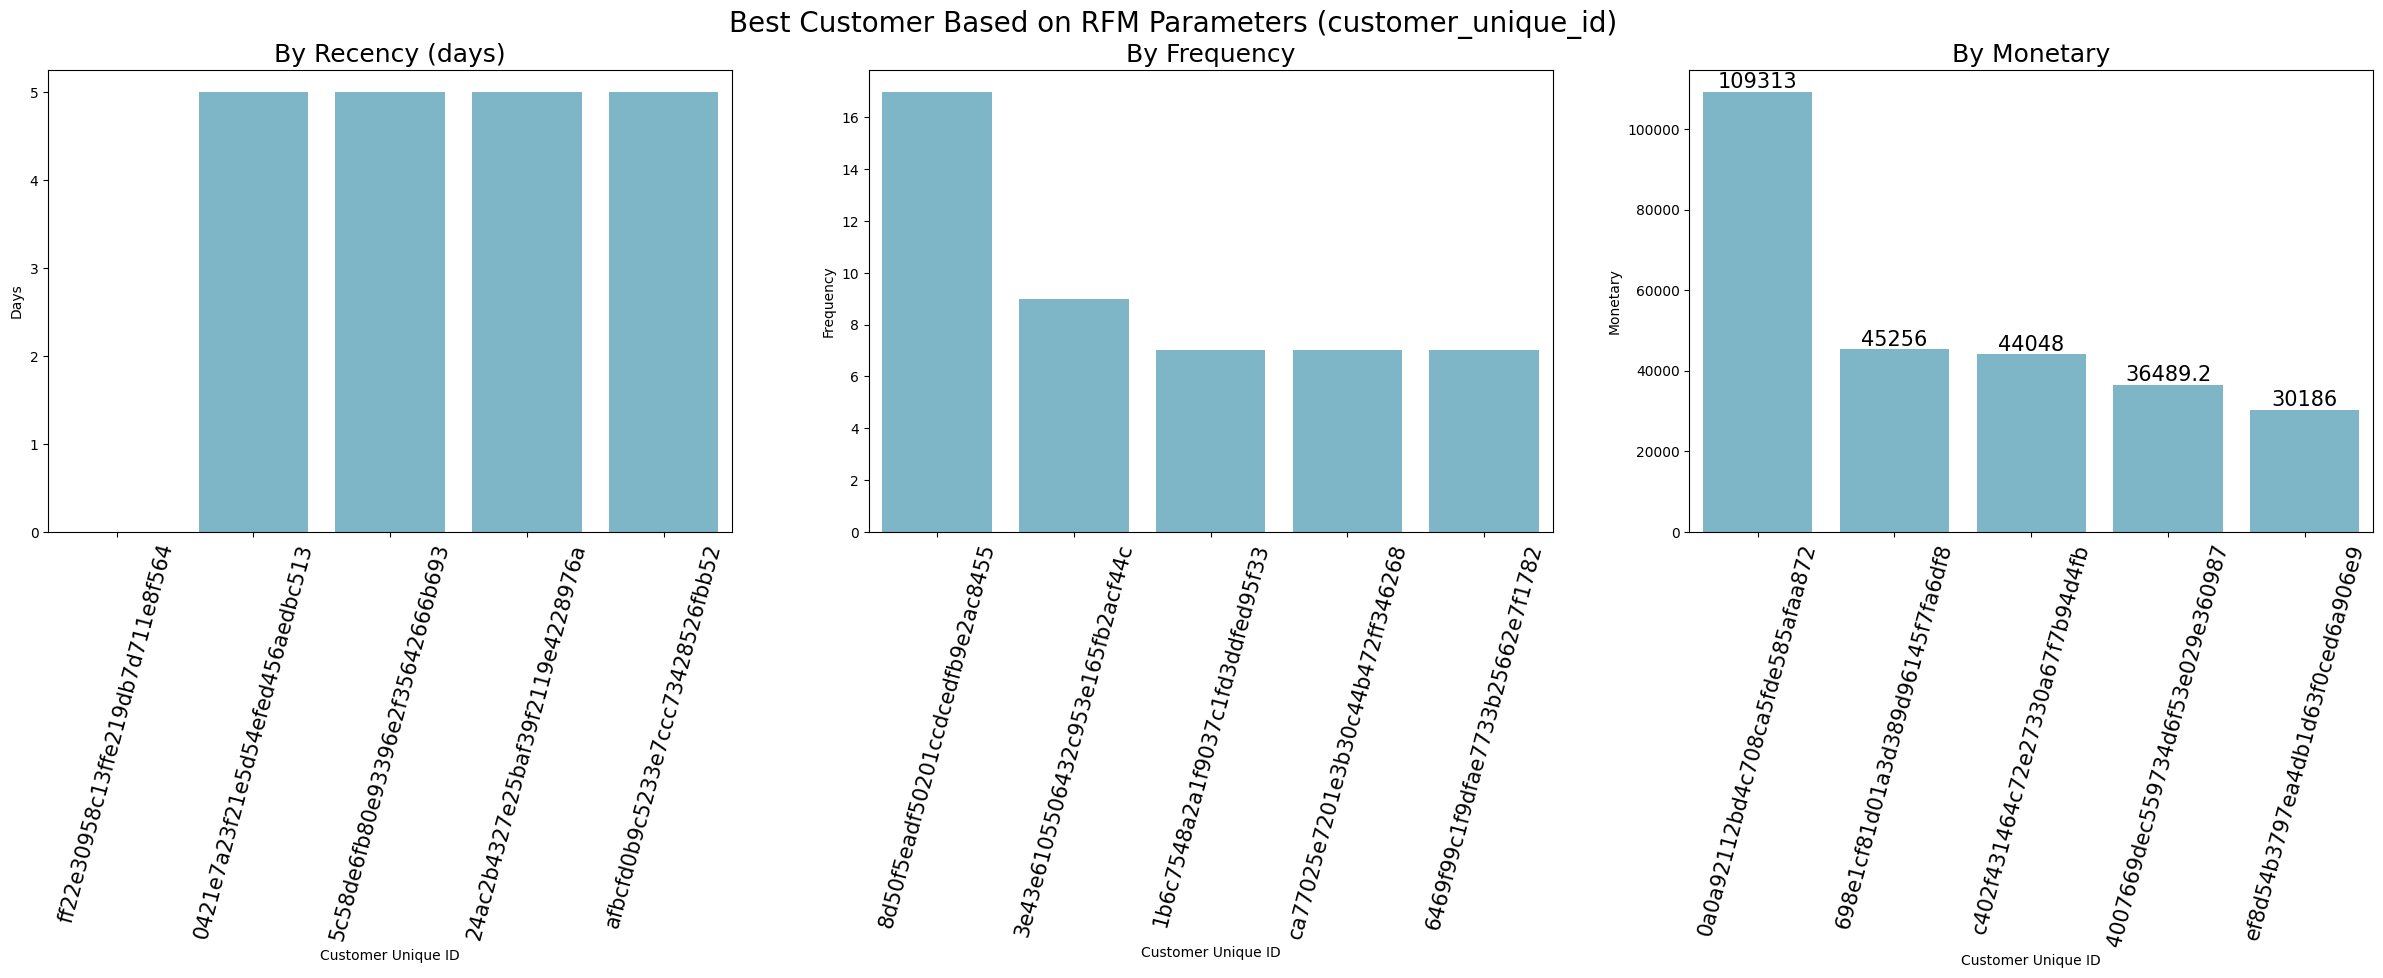

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

sns.barplot(
    y="recency",
    x="customer_unique_id",
    data=rfm_df.sort_values(by="recency", ascending=True).head(5),
    color="#72BCD4",
    ax=ax[0]
)
ax[0].set_ylabel("Days")
ax[0].set_xlabel("Customer Unique ID")
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15, rotation=75)

sns.barplot(
    x="customer_unique_id",
    y="frequency",
    data=rfm_df.sort_values(by="frequency", ascending=False).head(5),
    color="#72BCD4",
    ax=ax[1]
)
ax[1].set_xlabel("Customer Unique ID")
ax[1].set_ylabel("Frequency")
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis ='x', labelsize=15, rotation=75)

sns.barplot(
    x="customer_unique_id",
    y="monetary",
    data=rfm_df.sort_values(by="monetary", ascending=False).head(5),
    color="#72BCD4",
    ax=ax[2]
)
ax[2].set_xlabel("Customer Unique ID")
ax[2].set_ylabel("Monetary")
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis ='x', labelsize=15, rotation=75)
ax[2].bar_label(ax[2].containers[0], label_type="edge", fontsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_unique_id)", fontsize=20)
plt.show()

## Conclusion

- Conclusion pertanyaan 1, Bagaimana demografi pelanggan?

5 kota (city) dengan jumlah pelanggan terbanyak yaitu:
sao paulo         15400,
rio de janeiro     6834,
belo horizonte     2756,
brasilia           2124,
curitiba           1511.

5 negara (state) dengan jumlah pelanggan terbanyak yaitu:
SP    41419,
RJ    12766,
MG    11571,
RS     5441,
PR     5023.

- conclusion pertanyaan 2, Bagaimana penjualan dan revenue perusahaan satu tahun terakhir?

Penjualan pada bulan 10 tahun 2017 hingga bulan 8 tahun 2018 mengalami kenaikan dan penurunan yang wajar dengan rentang R$2000, namun pada bulan 9 tahun 2018 penjualannya turun karena data di hulan tersebut masih sedikit (belum penuh satu bulan).

- conclusion pertanyaan 3, Produk apa yang paling banyak terjual?

Produk yang paling banyak terjual adalah produk dengan kode 422879e10f46682990de24d770e7f83d.

- conclusion pertanyaan 4, Kategori produk apa yang paling banyak terjual?

Kategori produk yang paling banyak terjual adalah bed_bath_table, yaitu sebanyak 14777 barang.

- conclusion pertanyaan 5, Kategori produk apa yang paling banyak dijual oleh seller?

Kategori yang paling banyak dijual oleh seller adalah health_beauty, yaitu sebanyak 489 seller yang menjualnya.

- conclusion pertanyaan 6, Kategori produk apa dengan rata-rata review paling bagus?

Kategori produk dengan rata-rata review paling besar adalah cds_dvds_musicals dengan nilai rata-rata sebesar 4,64.

- conclusion pertanyaan 7, Best seller berdasarkan jumlah order?

Penjual terbaik berdasarkan jumlah order adalah penjual dengan kode seller id 6560211a19b47992c3666cc44a7e94c0, dengan jumlah order sebanyak 1847.

- conclusion pertanyaan 8, Bagaimana demografi sellers?

5 kota (city) dengan jumlah seller terbanyak yaitu:
sao paulo         682,
curitiba          126,
rio de janeiro     96,
belo horizonte     65,
ribeirao preto     52.

5 negara (state) dengan jumlah seller terbanyak yaitu:
SP    1823,
PR     344,
MG     240,
SC     187,
RJ     170.

- conclusion pertanyaan 9, Metode pembayaran apa yang paling banyak digunakan?

Metode pembayaran yang paling banyak digunakan adalah credit card, penggunanya mencapai 75%, diikuti dengan metode pembayaran boleto sebanyak 19%.

Export data menjadi csv

all_df.to_csv("./dashboard/main_data.csv", index=False, date_format="%Y-%m-%d %H:%M:%S")